In [289]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [290]:
ebola_Data = pd.read_csv('Data/Data/country_timeseries.csv')

### List of contents: 
   1. Original dataset info
   2. The dataset after tidy
   3. Trim null rows
   4. Change the date to date-time format
   5. Daily summary for each country
   6. Daily sorted cases
   7. Total number of deaths and cases in each day
   8. Monthly sum and average for each country
   9. Monthly sorted cases
   10. Monthly total sum and average
   11. Total average deaths and cases for each country
   12. Check the first 100 days trend for both Deaths and Cases
   13. Maximum and minimum deaths
   14. One country trend

# 1. Original dataset info

### First we can see the information of the dataset, before tidy up:

In [291]:
ebola_Data.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
ebola_Data.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [293]:
ebola_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [294]:
#Melt for cases
ebola_df = ebola_Data.melt(id_vars=['Date','Day','Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
              'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
              'Cases_Mali'], var_name="Country",value_name='Deaths' )

In [295]:
ebola_df.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Country,Deaths
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,Deaths_Guinea,1786.0
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,Deaths_Guinea,1781.0
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,Deaths_Guinea,1767.0
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,Deaths_Guinea,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,Deaths_Guinea,1739.0


In [296]:
#Melt for deaths
ebola_df = ebola_df.melt(id_vars=['Date','Day','Country',"Deaths"], var_name="Country_2",value_name='Cases' )

In [297]:
ebola_df.head()

,Date,Day,Country,Deaths,Country_2,Cases
0,1/5/2015,289,Deaths_Guinea,1786.0,Cases_Guinea,2776.0
1,1/4/2015,288,Deaths_Guinea,1781.0,Cases_Guinea,2775.0
2,1/3/2015,287,Deaths_Guinea,1767.0,Cases_Guinea,2769.0
3,1/2/2015,286,Deaths_Guinea,NaN,Cases_Guinea,NaN
4,12/31/2014,284,Deaths_Guinea,1739.0,Cases_Guinea,2730.0


In [298]:
var_split=ebola_df["Country"].str.split('_')
var_split.head()

0    [Deaths, Guinea]
1    [Deaths, Guinea]
2    [Deaths, Guinea]
3    [Deaths, Guinea]
4    [Deaths, Guinea]
Name: Country, dtype: object

In [299]:
type(var_split)

var_split.iloc[0][1]

ebola_df['Country']=var_split.str.get(1)

ebola_df

,Date,Day,Country,Deaths,Country_2,Cases
0,1/5/2015,289,Guinea,1786.0,Cases_Guinea,2776.0
1,1/4/2015,288,Guinea,1781.0,Cases_Guinea,2775.0
2,1/3/2015,287,Guinea,1767.0,Cases_Guinea,2769.0
3,1/2/2015,286,Guinea,NaN,Cases_Guinea,NaN
4,12/31/2014,284,Guinea,1739.0,Cases_Guinea,2730.0
...,...,...,...,...,...,...
7803,3/27/2014,5,Mali,NaN,Cases_Mali,NaN
7804,3/26/2014,4,Mali,NaN,Cases_Mali,NaN
7805,3/25/2014,3,Mali,NaN,Cases_Mali,NaN
7806,3/24/2014,2,Mali,NaN,Cases_Mali,NaN


In [300]:
print(ebola_df[(ebola_df['Cases'] > 0) & (ebola_df['Country'] == 'Spain')].sum())

Date         1/5/20151/4/20151/3/201512/31/201412/28/201412...
Day                                                      58395
Country      SpainSpainSpainSpainSpainSpainSpainSpainSpainS...
Deaths                                                      17
Country_2    Cases_GuineaCases_GuineaCases_GuineaCases_Guin...
Cases                                                   490523
dtype: object


# 2. The dataset after tidy

### Now there are separated deaths and cases columns for each country, and we have consiced the unnecessary rows. So for each country in each day, we have just one row now:

In [301]:
#Drop the second country column since the names were in order.
ebola_df.drop('Country_2', axis=1, inplace=True)

In [302]:
ebola_df.head()

,Date,Day,Country,Deaths,Cases
0,1/5/2015,289,Guinea,1786.0,2776.0
1,1/4/2015,288,Guinea,1781.0,2775.0
2,1/3/2015,287,Guinea,1767.0,2769.0
3,1/2/2015,286,Guinea,NaN,NaN
4,12/31/2014,284,Guinea,1739.0,2730.0


In [303]:
ebola_df.isna().sum()

Date          0
Day           0
Country       0
Deaths     4880
Cases      4832
dtype: int64

In [304]:
ebola_df.shape

(7808, 5)

# 3. Trim null rows

#### You can check whether all rows have a null by using .isnull() and all() in a chain. isnull() produces a dataframe with booleans, and all(axis=1) checks whether all values in a given rows are true. If that's the case, that means that all values in the rows are nulls.

#### This way, we eliminated the rows that all values of them are null:

In [305]:
inds = ebola_df[["Deaths", "Cases"]].isnull().all(axis=1) 

In [306]:
ebola_df= ebola_df.loc[~inds, :]

#### And the number of rows is decreased:

In [307]:
ebola_df.shape

(4370, 5)

In [308]:
ebola_df.describe().round()

,Day,Deaths,Cases
count,4370.0,2928.0,2976.0
mean,152.0,551.0,1319.0
std,83.0,877.0,2357.0
min,0.0,0.0,0.0
25%,86.0,4.0,7.0
50%,162.0,112.0,185.0
75%,220.0,632.0,1436.0
max,289.0,3496.0,10030.0


# 4. Change the date to date-time format

In [309]:
import datetime
ebola_df['Date'] = pd.to_datetime(ebola_df['Date'])

C:\Users\Hoda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [310]:
ebola_df.set_index('Date', drop=True,inplace=True)

In [311]:
ebola_df.head()

,Day,Country,Deaths,Cases
Date,,,,
2015-01-05,289,Guinea,1786.0,2776.0
2015-01-04,288,Guinea,1781.0,2775.0
2015-01-03,287,Guinea,1767.0,2769.0
2014-12-31,284,Guinea,1739.0,2730.0
2014-12-28,281,Guinea,1708.0,2706.0


In [312]:
ebola_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4370 entries, 2015-01-05 to 2014-10-22
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      4370 non-null   int64  
 1   Country  4370 non-null   object 
 2   Deaths   2928 non-null   float64
 3   Cases    2976 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 170.7+ KB


In [313]:
ebola_df['Country'].value_counts().count()

8

# 5. Daily summary for each country

In [314]:
monthly_stat_country = ebola_df.sort_values(by=['Date'])
monthly_stat_country.head(50)

,Day,Country,Deaths,Cases
Date,,,,
2014-03-22,0,Liberia,NaN,49.0
2014-03-22,0,Guinea,29.0,NaN
2014-03-22,0,Guinea,29.0,NaN
2014-03-22,0,Guinea,29.0,NaN
2014-03-22,0,SierraLeone,NaN,49.0
2014-03-22,0,Guinea,29.0,NaN
2014-03-22,0,Spain,NaN,49.0
2014-03-22,0,Guinea,29.0,NaN
2014-03-22,0,Nigeria,NaN,49.0


# 6. Daily sorted cases

In [315]:
monthly_stat_country = ebola_df.sort_values(by=['Date', 'Cases'])
monthly_stat_country.tail(50)

,Day,Country,Deaths,Cases
Date,,,,
2015-01-04,288,Spain,NaN,2775.0
2015-01-04,288,Mali,NaN,2775.0
2015-01-04,288,Guinea,1781.0,9780.0
2015-01-04,288,Liberia,NaN,9780.0
2015-01-04,288,SierraLeone,2943.0,9780.0
2015-01-04,288,Nigeria,NaN,9780.0
2015-01-04,288,Senegal,NaN,9780.0
2015-01-04,288,UnitedStates,NaN,9780.0
2015-01-04,288,Spain,NaN,9780.0


# 7. Total number of deaths and cases in each day

In [316]:
ebola_per_day=ebola_df.groupby('Date')['Cases','Deaths'].sum()
ebola_per_day.head()

C:\Users\Hoda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Cases,Deaths
Date,,
2014-03-22,392.0,232.0
2014-03-24,688.0,472.0
2014-03-25,688.0,480.0
2014-03-26,688.0,496.0
2014-03-27,936.0,616.0


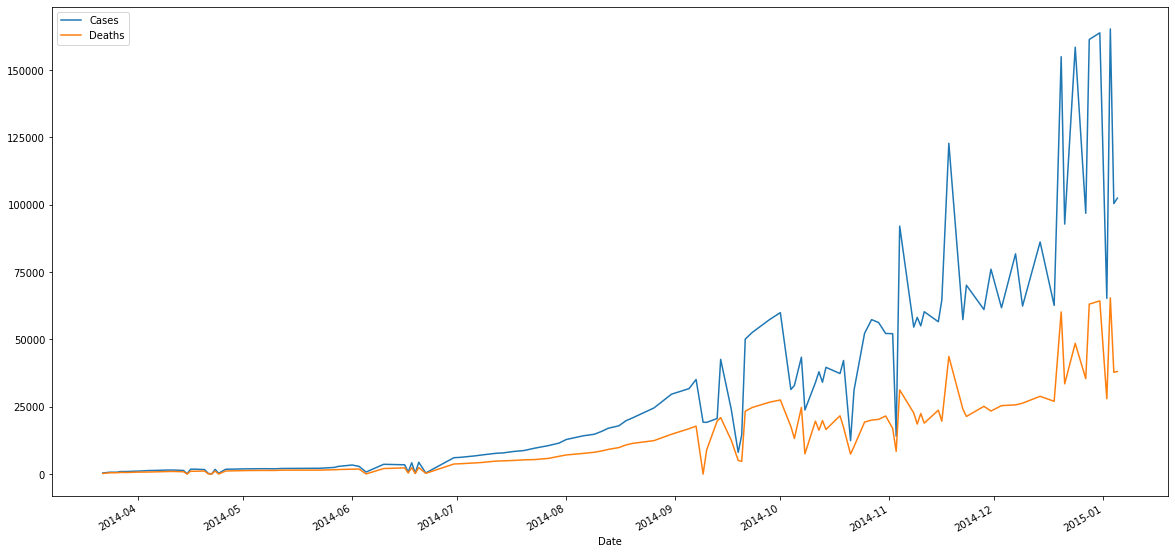

In [317]:
ebola_per_day.plot(kind='line',figsize=(20,10))

# 8. Monthly total sum and average

### Total number of cases and deaths in each month:

In [318]:
monthly = ebola_df.groupby(pd.Grouper(freq="M"))['Deaths', 'Cases'].sum()
monthly

C:\Users\Hoda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Deaths,Cases
Date,,
2014-03-31,4160.0,6336.0
2014-04-30,10696.0,17592.0
2014-05-31,12888.0,19344.0
2014-06-30,17472.0,30216.0
2014-07-31,50184.0,84496.0
2014-08-31,107304.0,201176.0
2014-09-30,181400.0,375392.0
2014-10-31,301024.0,678304.0
2014-11-30,320424.0,894928.0


### Average cases and deaths in each month:

In [319]:
monthly_mean = ebola_df.groupby(pd.Grouper(freq="M"))['Deaths', 'Cases'].mean()
monthly_mean

C:\Users\Hoda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Deaths,Cases
Date,,
2014-03-31,34.666667,52.800000
2014-04-30,47.750000,73.300000
2014-05-31,59.666667,89.555556
2014-06-30,99.272727,171.681818
2014-07-31,190.090909,320.060606
2014-08-31,304.840909,558.822222
2014-09-30,596.710526,1173.100000
2014-10-31,616.852459,1389.967213
2014-11-30,635.761905,1775.650794


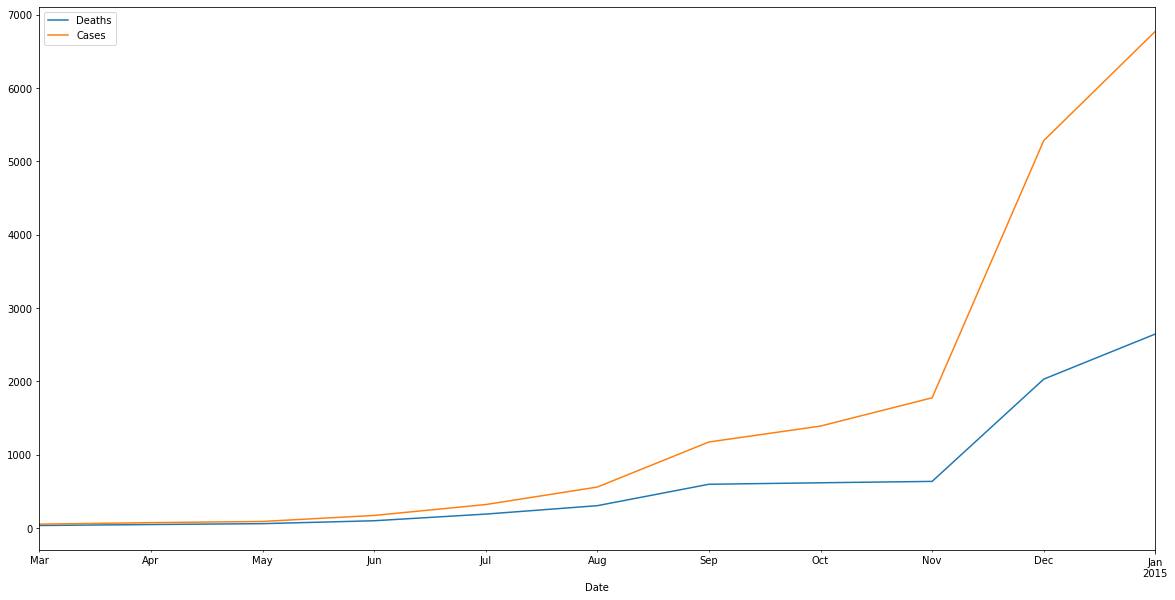

In [320]:
monthly_mean.plot(kind='line',figsize=(20,10))

# 9. Total average deaths and cases for each country

In [321]:
avg_country = ebola_df.groupby('Country')['Deaths', 'Cases'].mean()
avg_country
ebola_df[(ebola_df['Cases'] > 0) & (ebola_df['Country'] == 'Spain')].sum()

C:\Users\Hoda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Day                                                    58395
Country    SpainSpainSpainSpainSpainSpainSpainSpainSpainS...
Deaths                                                    17
Cases                                                 490523
dtype: object

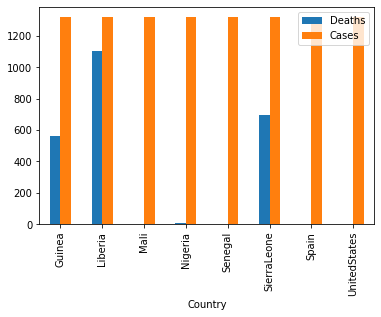

In [322]:
avg_country.plot.bar() 

# 12. Check the first 100 days trend for both Deaths and Cases

In [323]:
 start_date_ebola ='2014-03-22'

In [324]:
import datetime

In [325]:
start_date_ebola =datetime.datetime.strptime(start_date_ebola, '%Y-%m-%d')

In [326]:
def get_100_days(start_date_ebola):
    day_100 = (start_date_ebola)+ datetime.timedelta(days=100)
    return day_100

In [327]:
get_100_days(start_date_ebola)

datetime.datetime(2014, 6, 30, 0, 0)

In [328]:
ebola_df['2014-03-22':'2014-06-30']

,Day,Country,Deaths,Cases
Date,,,,
2014-06-30,100,Guinea,303.0,413.0
2014-06-20,90,Guinea,270.0,390.0
2014-06-18,88,Guinea,267.0,390.0
2014-06-16,86,Guinea,264.0,398.0
2014-06-10,80,Guinea,226.0,351.0
...,...,...,...,...
2014-04-04,13,SierraLeone,2.0,NaN
2014-04-01,10,SierraLeone,2.0,NaN
2014-03-31,9,SierraLeone,2.0,NaN


In [329]:
ebola_day_100 = ebola_df['2014-03-22':'2014-06-30']

In [330]:
ebola_day_100 

,Day,Country,Deaths,Cases
Date,,,,
2014-06-30,100,Guinea,303.0,413.0
2014-06-20,90,Guinea,270.0,390.0
2014-06-18,88,Guinea,267.0,390.0
2014-06-16,86,Guinea,264.0,398.0
2014-06-10,80,Guinea,226.0,351.0
...,...,...,...,...
2014-04-04,13,SierraLeone,2.0,NaN
2014-04-01,10,SierraLeone,2.0,NaN
2014-03-31,9,SierraLeone,2.0,NaN


In [331]:
ebola_day_100 =ebola_day_100 .groupby('Date')['Cases','Deaths'].sum()

C:\Users\Hoda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


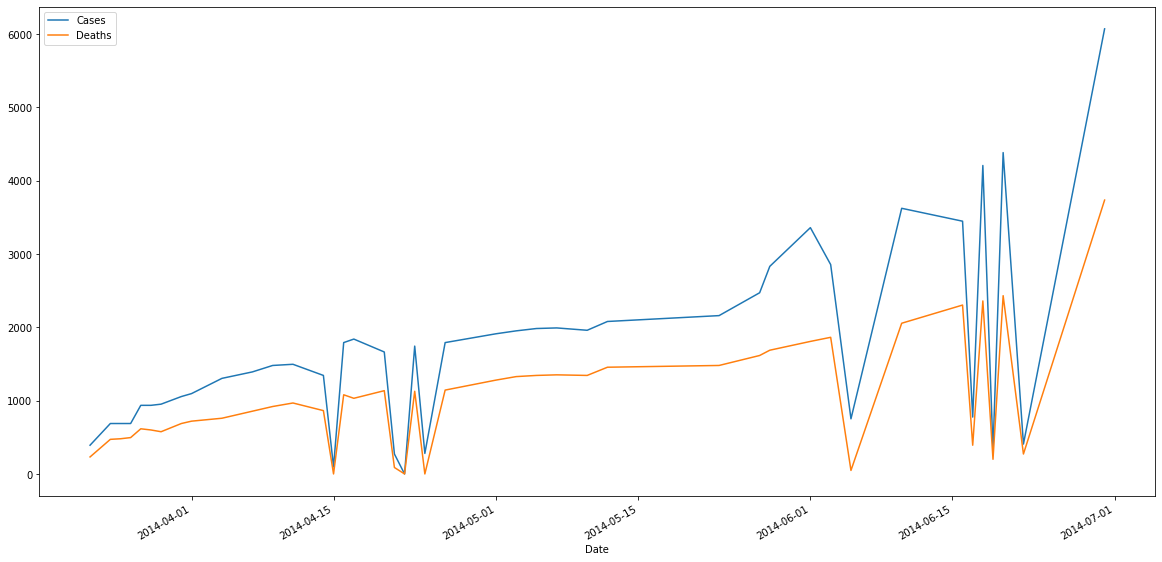

In [332]:
ebola_day_100.plot(kind='line',figsize=(20,10))

# 13. Maximum and minimum deaths

In [333]:
dgroup_countries_ebola = ebola_df.groupby('Country')['Deaths'].max()

In [334]:
dgroup_countries_ebola.nlargest(3, keep='all')

Country
Liberia        3496.0
SierraLeone    2977.0
Guinea         1786.0
Name: Deaths, dtype: float64

In [335]:
dgroup_countries_ebola.nsmallest(3, keep='all')

Country
Senegal         0.0
Spain           1.0
UnitedStates    1.0
Name: Deaths, dtype: float64

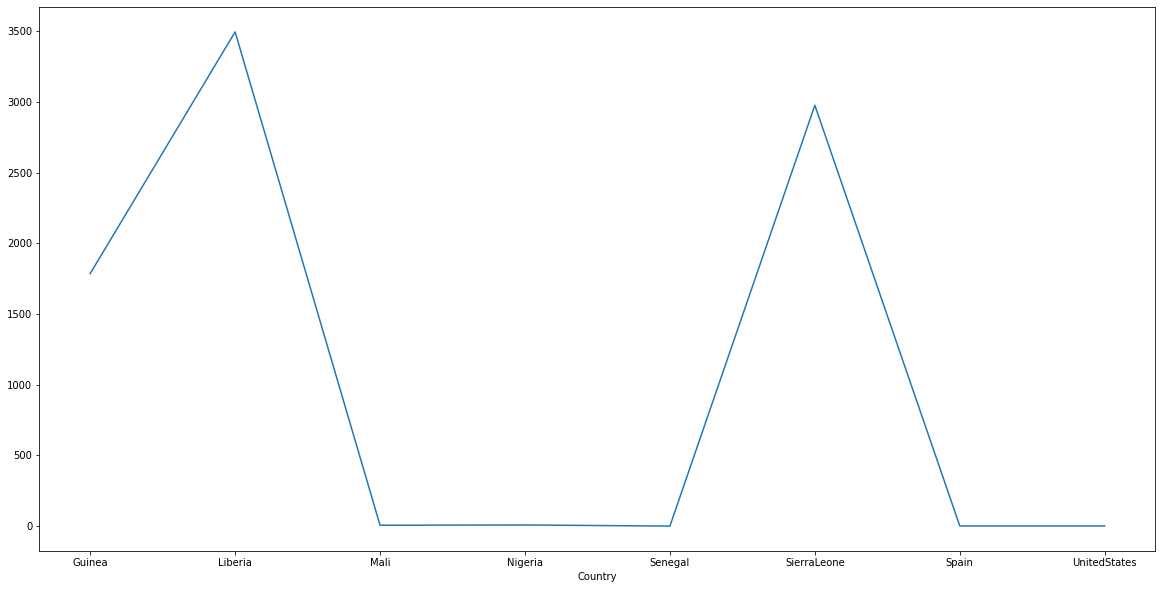

In [336]:
dgroup_countries_ebola.plot(kind='line',figsize=(20,10))

# 14. One country trend

In [337]:
trend_liberia=ebola_df.groupby('Country').get_group('Liberia')

In [339]:
trend_liberia

,Day,Country,Deaths,Cases
Date,,,,
2015-01-05,289,Liberia,NaN,2776.0
2015-01-04,288,Liberia,NaN,2775.0
2015-01-03,287,Liberia,3496.0,2769.0
2015-01-02,286,Liberia,3496.0,NaN
2014-12-31,284,Liberia,3471.0,2730.0
...,...,...,...,...
2014-04-01,10,Liberia,5.0,NaN
2014-03-31,9,Liberia,4.0,NaN
2014-03-29,7,Liberia,2.0,NaN


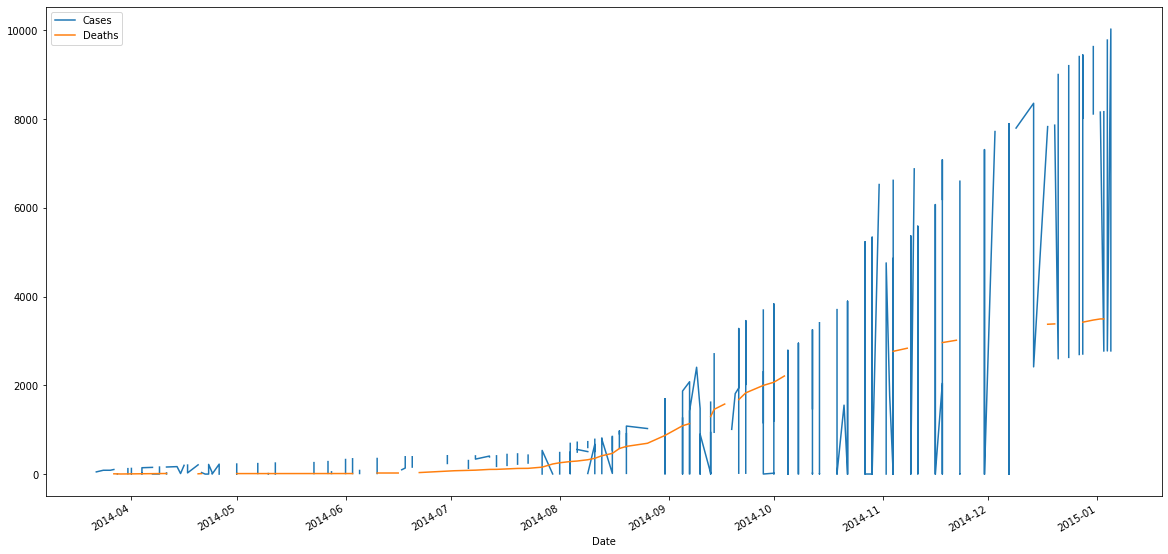

In [342]:
trend_liberia.plot(y=['Cases', 'Deaths'], kind='line',figsize=(20,10))